#Format all images and save in file

In [1]:
import os
# from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


from data_fixing import *
from train_model import *
import tensorflowjs as tfjs
# import tensorflow as tf



2025-03-10 02:15:30.480203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-10 02:15:30.480258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-10 02:15:30.481424: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 02:15:30.488012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-10 02:15:31.341987: W tensorflow/compiler/tf2

In [2]:

sys_details = tf.sysconfig.get_build_info()
print(sys_details["cuda_version"])

print("TensorFlow version:", tf.__version__)
print("TensorFlow.js version:", tfjs.__version__)
# print("Keras version:", tf.keras.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(False)

12.2
TensorFlow version: 2.15.0
TensorFlow.js version: 4.22.0
Num GPUs Available:  1


2025-03-10 02:15:33.065810: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-10 02:15:33.098012: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-10 02:15:33.098074: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:

print("GPU devices:", tf.config.list_physical_devices('GPU'))

print("Built with CUDA:", tf.test.is_built_with_cuda())

print("TensorFlow version:", tf.__version__)

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    # Enable memory growth for the first GPU
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("Memory growth enabled for GPU")
else:
    print("No GPU devices found.")


GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Built with CUDA: True
TensorFlow version: 2.15.0
Memory growth enabled for GPU


In [4]:
# format_and_label_data(folder_dir='../images/all_gen_1_images/', grayscale=False)  # Saves as "pokemon_rgb_128x128.npz"
#

In [5]:
data = np.load('../images_as_npz/pokemon_rgb_no_skipped_imgs128x128.npz')
images = data['images']
print(f"Loaded images with shape: {images.shape}")
labels = data['labels']
print(f"Loaded labels with shape: {labels.shape}")


Loaded images with shape: (15752, 128, 128, 3)
Loaded labels with shape: (15752,)


In [6]:
# Count occurrences of each unique label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Find the Pokémon with the least amount of labels
min_label_index = np.argmin(label_counts)
min_label = unique_labels[min_label_index]
min_label_count = label_counts[min_label_index]

print(f"Pokemon with the least amount of labels: {min_label}")
print(f"Number of occurrences: {min_label_count}")

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=12366)

train_dataset, val_dataset = create_augmented_train_val_datasets(X_train, y_train, X_test, y_test)

Pokemon with the least amount of labels: 0
Number of occurrences: 53


2025-03-10 02:15:43.427503: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-10 02:15:43.427702: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-10 02:15:43.427767: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-10 02:15:43.644922: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-10 02:15:43.645013: I external/local_xla/xla/stream_executor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6167997..0.19457752].


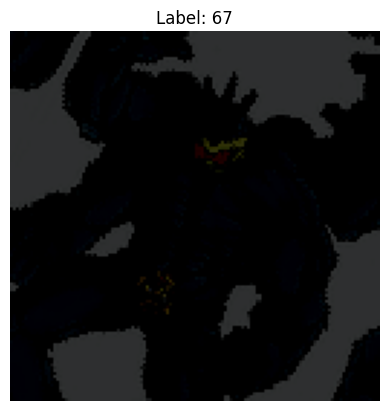

In [14]:
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from the train dataset
images_batch, labels_batch = next(iter(train_dataset))

# Select the first image from the batch (index 0)
image = images_batch[7]

# Display the image
plt.imshow(image.numpy())  # Convert tensor to numpy for visualization
plt.title(f"Label: {labels_batch[7].numpy()}")  # Display the first label in the batch
plt.axis('off')  # Hide axes for better visualization
plt.show()



In [15]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming y_train contains the true class labels for your training set
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))


num_classes = np.unique(labels).size
print(num_classes)
print(class_weight_dict)

142
{0: 2.2184859154929577, 1: 1.4789906103286385, 2: 1.3049917149958574, 3: 0.9645590936925903, 4: 1.3865536971830985, 5: 1.1991815759421394, 6: 1.2677062374245474, 7: 0.8963579456537203, 8: 0.814123271740535, 9: 0.4349972383319525, 10: 0.9645590936925903, 11: 0.9055044553032481, 12: 1.1376850848681834, 13: 1.0691498387917868, 14: 0.47454244181667543, 15: 0.869994476663905, 16: 1.167624166048925, 17: 1.3244692032793777, 18: 1.2324921752738653, 19: 1.031853914182771, 20: 1.1524602158404975, 21: 1.4312812358019082, 22: 1.3865536971830985, 23: 1.2860787915901204, 24: 1.4312812358019082, 25: 0.9148395527806011, 26: 0.7649951432734337, 27: 1.095548600243436, 28: 1.1831924882629108, 29: 0.9859937402190924, 30: 0.8963579456537203, 31: 1.095548600243436, 32: 0.9970723215698687, 33: 1.8110089106064962, 34: 1.0821882514599794, 35: 0.6932768485915493, 36: 0.8532638136511376, 37: 0.8451374916163649, 38: 0.6774002795398344, 39: 0.7394953051643193, 40: 0.7853047488470647, 41: 1.5040582477918358, 42

In [16]:
model = create_CNN_model(dropout=0.4,grayscale=False,image_size=128, num_classes=num_classes)
# model.build((None, 128, 128, 3))
# model.save('./temp2.keras')
# model.summary()

In [18]:
save_path = os.path.join('models', 'v1.keras')
os.makedirs(os.path.dirname(save_path), exist_ok=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
checkpoint = ModelCheckpoint(save_path, 
                            monitor='val_loss',    # Monitor validation loss
                            save_best_only=True,    # Save only the best weights
                            mode='min',             # 'min' because we want to minimize the loss
                            verbose=1)

In [23]:
model.fit(X_train, y_train, 
                epochs=20, 
                batch_size=32, 
                class_weight = class_weight_dict,
                validation_data=(X_test, y_test),
                callbacks= [checkpoint, early_stopping])
# model.fit(train_dataset, 
#         epochs=50, 
#         validation_data=val_dataset,
# class_weight = class_weight_dict,
#         callbacks= [checkpoint, early_stopping])

Epoch 1/20
393/394 [============================>.] - ETA: 0s - loss: 0.3243 - accuracy: 0.8963
Epoch 1: val_loss did not improve from 0.57051
394/394 [==============================] - 13s 33ms/step - loss: 0.3242 - accuracy: 0.8964 - val_loss: 0.5889 - val_accuracy: 0.8550
Epoch 2/20
394/394 [==============================] - ETA: 0s - loss: 0.3048 - accuracy: 0.9030
Epoch 2: val_loss did not improve from 0.57051
394/394 [==============================] - 9s 22ms/step - loss: 0.3048 - accuracy: 0.9030 - val_loss: 0.6182 - val_accuracy: 0.8531
Epoch 3/20
392/394 [============================>.] - ETA: 0s - loss: 0.2895 - accuracy: 0.9068
Epoch 3: val_loss did not improve from 0.57051
394/394 [==============================] - 9s 23ms/step - loss: 0.2892 - accuracy: 0.9068 - val_loss: 0.6189 - val_accuracy: 0.8505
Epoch 4/20
392/394 [============================>.] - ETA: 0s - loss: 0.2748 - accuracy: 0.9099
Epoch 4: val_loss did not improve from 0.57051
394/394 [======================

In [24]:
predictions = model.predict(X_test)  

predicted_classes = np.argmax(predictions, axis=1)  

true_classes = y_test
# print(len(X_test))
label_counts = np.bincount(predicted_classes)
print(label_counts)
accuracy = np.mean(predicted_classes == true_classes)
print()
print(f"Model accuracy: {accuracy * 100:.2f}%")

99/99 [==============================] - 1s 6ms/step
[16 20 13 23 19 21 15 22 33 54 24 22 19 20 56 37 15 24 17 22 35 21 12 17
 23 26 22 17 21 17 28 20 24 10 30 27 21 32 28 22 17 16 14 19 29 20 22 19
 28 43 18 13 20 22 15 23 40 19 22 25 14 20 20 21 18 32 14 14 12 13 20 21
 15 12 13  9 15 24 17 19 20 17 20 13 17 20 22 26 15 18 21 23 26 24 30 15
 32 26 25 20 18 24 31 23 28 21 28 26 23 19 16 32 19 15 13 16 17 21 28 20
 51 26 18 24 17 21 16 34 26 38 19 31 20 24 18 26 24 28 20 20 31 19]

Model accuracy: 85.50%


In [ ]:
model = tf.keras.models.load_model(save_path)

In [ ]:

# model = CNN_fit_train(model, X_train,y_train,X_test,y_test,num_epochs=4,num_batch=32, class_weights=class_weight_dict, save_path=save_path, datagen=True)
# model = CNN_tsData_train(model, train_dataset, val_dataset, class_weights = class_weight_dict, num_epochs=3, save_path = save_path)
                

Epoch 1/3


2025-03-09 18:26:39.868365: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 619364352 exceeds 10% of free system memory.
2025-03-09 18:26:42.137111: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2025-03-09 18:26:44.364571: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f849d2aaed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-09 18:26:44.364615: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2025-03-09 18:26:44.372142: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741566404.468603   19332 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


788/788 [==============================] - ETA: 0s - loss: 4.2332 - accuracy: 0.0659
Epoch 1: val_loss improved from inf to 551.56073, saving model to models/testing_aug_images.keras
788/788 [==============================] - 25s 21ms/step - loss: 4.2332 - accuracy: 0.0659 - val_loss: 551.5607 - val_accuracy: 0.0286
Epoch 2/3
788/788 [==============================] - ETA: 0s - loss: 3.4431 - accuracy: 0.1509
Epoch 2: val_loss did not improve from 551.56073
788/788 [==============================] - 15s 18ms/step - loss: 3.4431 - accuracy: 0.1509 - val_loss: 717.6770 - val_accuracy: 0.0168
Epoch 3/3
787/788 [============================>.] - ETA: 0s - loss: 3.0620 - accuracy: 0.2256
Epoch 3: val_loss improved from 551.56073 to 488.36499, saving model to models/testing_aug_images.keras
788/788 [==============================] - 13s 17ms/step - loss: 3.0619 - accuracy: 0.2256 - val_loss: 488.3650 - val_accuracy: 0.0232


In [ ]:
model.save(save_path)


In [ ]:
model = tf.keras.models.load_model(save_path)

In [25]:
tfjs.converters.save_keras_model(model, './tensorflow_js_model/this_one_is_good/')

/root/miniconda3/envs/gpu/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - 1s 6ms/step
457


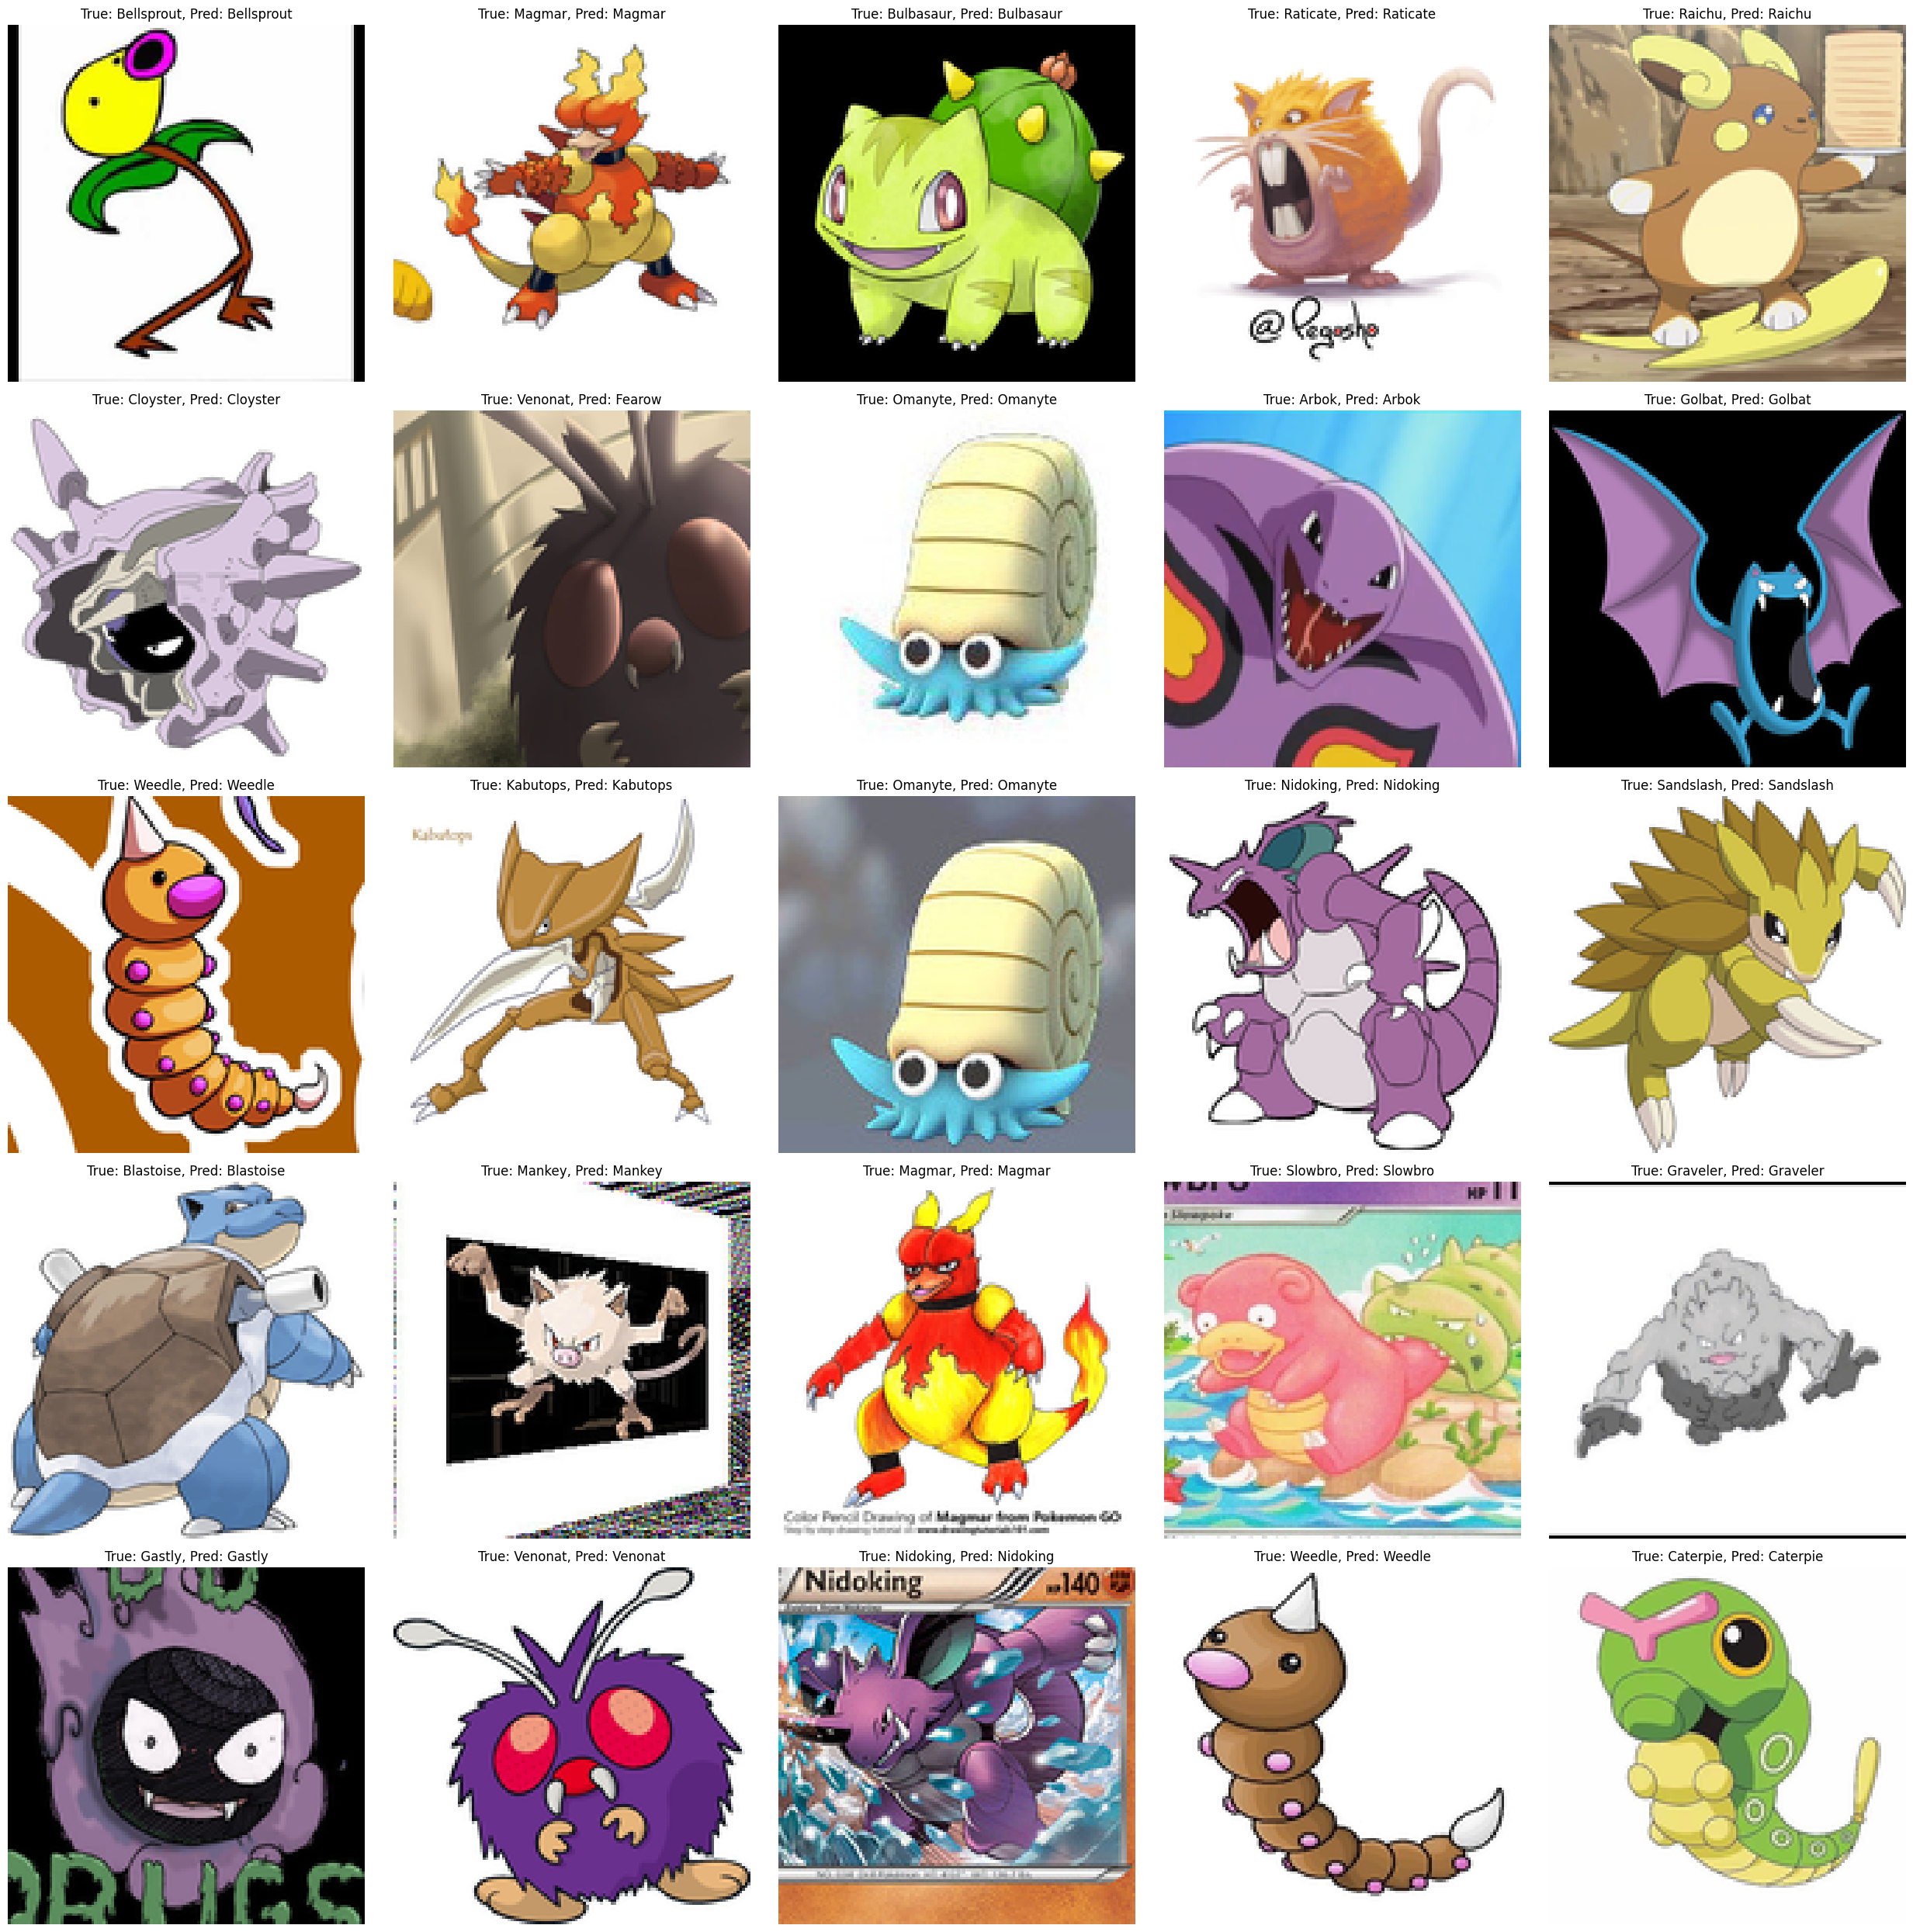

In [ ]:
import math
import matplotlib.pyplot as plt
index_to_pokemon = {0: 'Abra', 1: 'Aerodactyl', 2: 'Alakazam', 3: 'Arbok', 4: 'Arcanine', 5: 'Articuno', 6: 'Beedrill', 7: 'Bellsprout', 8: 'Blastoise', 9: 'Bulbasaur', 10: 'Butterfree', 11: 'Caterpie', 12: 'Chansey', 13: 'Charizard', 14: 'Charmander', 15: 'Charmeleon', 16: 'Clefable', 17: 'Clefairy', 18: 'Cloyster', 19: 'Cubone', 20: 'Dewgong', 21: 'Diglett', 22: 'Ditto', 23: 'Dodrio', 24: 'Doduo', 25: 'Dragonair', 26: 'Dragonite', 27: 'Dratini', 28: 'Drowzee', 29: 'Dugtrio', 30: 'Eevee', 31: 'Ekans', 32: 'Electabuzz', 33: 'Electrode', 34: 'Exeggcute', 35: 'Exeggutor', 36: 'Farfetchd', 37: 'Fearow', 38: 'Flareon', 39: 'Gastly', 40: 'Gengar', 41: 'Geodude', 42: 'Gloom', 43: 'Golbat', 44: 'Goldeen', 45: 'Golduck', 46: 'Graveler', 47: 'Grimer', 48: 'Growlithe', 49: 'Gyarados', 50: 'Haunter', 51: 'Hitmonchan', 52: 'Hitmonlee', 53: 'Horsea', 54: 'Hypno', 55: 'Ivysaur', 56: 'Jigglypuff', 57: 'Jolteon', 58: 'Jynx', 59: 'Kabutops', 60: 'Kadabra', 61: 'Kakuna', 62: 'Kangaskhan', 63: 'Kingler', 64: 'Koffing', 65: 'Lapras', 66: 'Lickitung', 67: 'Machamp', 68: 'Machoke', 69: 'Machop', 70: 'Magikarp', 71: 'Magmar', 72: 'Magnemite', 73: 'Magneton', 74: 'Mankey', 75: 'Marowak', 76: 'Meowth', 77: 'Metapod', 78: 'Mew', 79: 'Mewtwo', 80: 'Moltres', 81: 'MrMime', 82: 'Nidoking', 83: 'Nidoqueen', 84: 'Nidorina', 85: 'Nidorino', 86: 'Ninetales', 87: 'Oddish', 88: 'Omanyte', 89: 'Omastar', 90: 'Parasect', 91: 'Pidgeot', 92: 'Pidgeotto', 93: 'Pidgey', 94: 'Pikachu', 95: 'Pinsir', 96: 'Poliwag', 97: 'Poliwhirl', 98: 'Poliwrath', 99: 'Ponyta', 100: 'Porygon', 101: 'Primeape', 102: 'Psyduck', 103: 'Raichu', 104: 'Rapidash', 105: 'Raticate', 106: 'Rattata', 107: 'Rhydon', 108: 'Rhyhorn', 109: 'Sandshrew', 110: 'Sandslash', 111: 'Scyther', 112: 'Seadra', 113: 'Seaking', 114: 'Seel', 115: 'Shellder', 116: 'Slowbro', 117: 'Slowpoke', 118: 'Snorlax', 119: 'Spearow', 120: 'Squirtle', 121: 'Starmie', 122: 'Staryu', 123: 'Tangela', 124: 'Tauros', 125: 'Tentacool', 126: 'Tentacruel', 127: 'Vaporeon', 128: 'Venomoth', 129: 'Venonat', 130: 'Venusaur', 131: 'Victreebel', 132: 'Vileplume', 133: 'Voltorb', 134: 'Vulpix', 135: 'Wartortle', 136: 'Weedle', 137: 'Weepinbell', 138: 'Weezing', 139: 'Wigglytuff', 140: 'Zapdos', 141: 'Zubat'}
predictions = model.predict(X_test)  

predicted_classes = np.argmax(predictions, axis=1)  

true_classes = y_test

incorrect_indices = np.where(predicted_classes != true_classes)[0]

print(len(incorrect_indices))
# Visualize the incorrectly predicted images
num_images_to_show =25 

num_columns = 5
num_rows = math.ceil(num_images_to_show / num_columns)

# Create a figure for plotting
plt.figure(figsize=(25, 25))

for i, idx in enumerate(incorrect_indices[:num_images_to_show]):
    plt.subplot(num_rows, num_columns, i + 1)
    
    img = X_test[idx]  
    true_label = y_test[idx] 
    predicted_label = np.argmax(predictions[idx]) 
    
    # Display the image
    plt.imshow(img)
    plt.title(f"True: {index_to_pokemon[true_label]}, Pred: {index_to_pokemon[predicted_label]}")
    plt.axis('off')

plt.tight_layout()  #
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate the number of misclassifications per class
misclassified_per_class = np.sum(conf_matrix, axis=1) - np.diagonal(conf_matrix)

sorted_indices = np.argsort(misclassified_per_class)[::-1]

# Display classes with the most misclassifications
print("Classes with the most misclassifications:")
for idx in sorted_indices:
    print(f"Class {index_to_pokemon[idx]} was misclassified {misclassified_per_class[idx]} times.")

Classes with the most misclassifications:
Class Pidgeot was misclassified 11 times.
Class Poliwhirl was misclassified 10 times.
Class Koffing was misclassified 9 times.
Class Pidgeotto was misclassified 9 times.
Class Marowak was misclassified 9 times.
Class Squirtle was misclassified 8 times.
Class Rapidash was misclassified 8 times.
Class Pidgey was misclassified 8 times.
Class Pinsir was misclassified 7 times.
Class Clefable was misclassified 7 times.
Class Ninetales was misclassified 7 times.
Class Mew was misclassified 7 times.
Class Nidoqueen was misclassified 7 times.
Class Golduck was misclassified 7 times.
Class Golbat was misclassified 6 times.
Class Machop was misclassified 6 times.
Class Rhyhorn was misclassified 6 times.
Class Dragonite was misclassified 6 times.
Class Scyther was misclassified 6 times.
Class Eevee was misclassified 6 times.
Class Poliwag was misclassified 6 times.
Class Sandslash was misclassified 6 times.
Class Kakuna was misclassified 6 times.
Class Vul

In [ ]:
# Find the indices of misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]
# Initialize a list to store details of misclassified images
misclassified_details = []

# Loop over misclassified indices
for idx in misclassified_indices:
    true_label = true_classes[idx]
    predicted_label = predicted_classes[idx]
    misclassified_details.append((idx, true_label, predicted_label))

print("Misclassified Images:")
for idx, true_label, predicted_label in misclassified_details:
    print(f"Image {idx} - True: {index_to_pokemon[true_label]} | Predicted: {index_to_pokemon[predicted_label]}")

Misclassified Images:
Image 20 - True: Raichu | Predicted: Flareon
Image 26 - True: Clefable | Predicted: Wigglytuff
Image 36 - True: Pidgeotto | Predicted: Pidgeot
Image 58 - True: Staryu | Predicted: Rhyhorn
Image 60 - True: Magnemite | Predicted: Tentacruel
Image 68 - True: Machop | Predicted: Tentacool
Image 74 - True: Pidgeot | Predicted: Spearow
Image 104 - True: Vaporeon | Predicted: Articuno
Image 110 - True: Vaporeon | Predicted: Dragonair
Image 111 - True: Kadabra | Predicted: Abra
Image 118 - True: Primeape | Predicted: MrMime
Image 123 - True: Scyther | Predicted: Sandshrew
Image 124 - True: Goldeen | Predicted: MrMime
Image 127 - True: Weedle | Predicted: Charmander
Image 130 - True: Meowth | Predicted: Primeape
Image 135 - True: Eevee | Predicted: Growlithe
Image 136 - True: Pidgeot | Predicted: Pidgeotto
Image 143 - True: Omastar | Predicted: Zubat
Image 158 - True: Snorlax | Predicted: Magnemite
Image 162 - True: Machop | Predicted: Pinsir
Image 164 - True: Charizard | 

In [29]:
print(predicted_classes)
# print(y_test)

[121 138  74 ...  81 136 110]


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# y_pred = model.predict(X_test) 
# y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, predicted_classes)
# Sum up incorrect predictions for each class
incorrect_counts = np.sum(cm, axis=1) - np.diag(cm)

# Get indices of the top 10 misclassified Pokémon
top_misclassified_indices = np.argsort(incorrect_counts)[-10:]

# Filter the confusion matrix to show only the top misclassifications
cm_top = cm[top_misclassified_indices][:, top_misclassified_indices]
top_labels = [index_to_pokemon[i] for i in top_misclassified_indices]

# Plot the heatmap
sns.heatmap(cm_top, annot=True, fmt="d", cmap="Blues", xticklabels=top_labels, yticklabels=top_labels)
plt.show()

ModuleNotFoundError: No module named 'seaborn'